Q1. Consider the following 2-D datasets flame (flame.csv) and toy (toy.csv).
Apply K-means, hierarchical clustering algorithms (use Sklearn) to segment the
above datasets into 2 clusters. Show the scatterplot for the original clusters as well as the clusters obtained by your implementation.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'y')

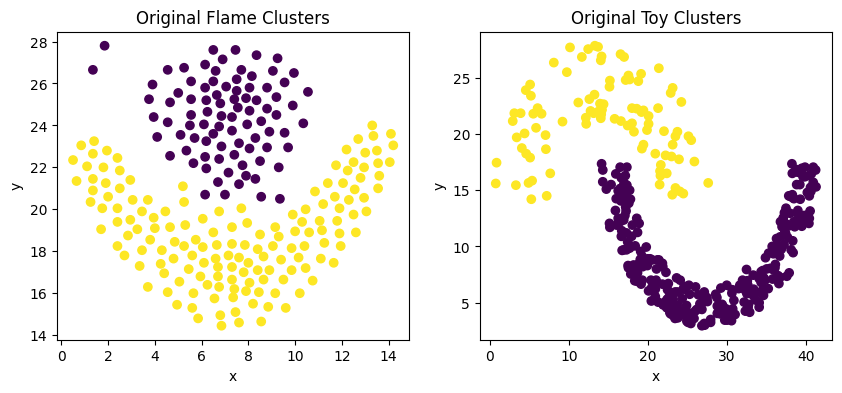

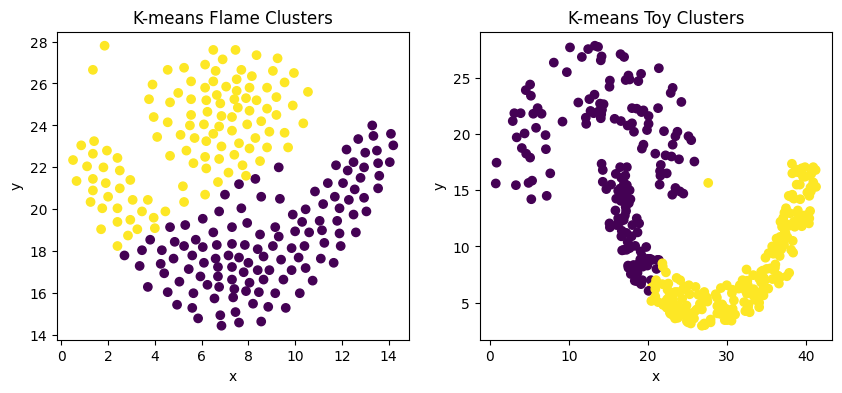

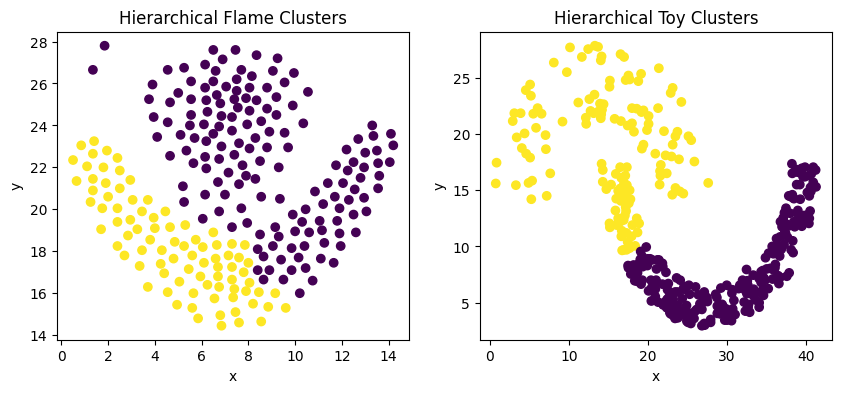

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

flame_data = pd.read_csv('flame.csv', header=None, names=['x', 'y', 'class'])
toy_data = pd.read_csv('toy.csv', header=None, names=['x', 'y', 'class'])

# Plot Original Flame Clusters
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(flame_data['x'], flame_data['y'], c=flame_data['class'], cmap='viridis')
plt.title('Original Flame Clusters')
plt.xlabel('x')
plt.ylabel('y')

# Plot Original Toy Clusters
plt.subplot(1, 2, 2)
plt.scatter(toy_data['x'], toy_data['y'], c=toy_data['class'], cmap='viridis')
plt.title('Original Toy Clusters')
plt.xlabel('x')
plt.ylabel('y')

# Perform K-means clustering
kmeans = KMeans(n_clusters=2)
flame_kmeans_labels = kmeans.fit_predict(flame_data[['x', 'y']])
toy_kmeans_labels = kmeans.fit_predict(toy_data[['x', 'y']])

# Plot K-means Flame Clusters
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(flame_data['x'], flame_data['y'], c=flame_kmeans_labels, cmap='viridis')
plt.title('K-means Flame Clusters')
plt.xlabel('x')
plt.ylabel('y')

# Plot K-means Toy Clusters
plt.subplot(1, 2, 2)
plt.scatter(toy_data['x'], toy_data['y'], c=toy_kmeans_labels, cmap='viridis')
plt.title('K-means Toy Clusters')
plt.xlabel('x')
plt.ylabel('yenter')

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
flame_hierarchical_labels = hierarchical.fit_predict(flame_data[['x', 'y']])
toy_hierarchical_labels = hierarchical.fit_predict(toy_data[['x', 'y']])

# Plot Hierarchical Flame Clusters
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(flame_data['x'], flame_data['y'], c=flame_hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Flame Clusters')
plt.xlabel('x')
plt.ylabel('y')

# Plot Hierarchical Toy Clusters
plt.subplot(1, 2, 2)
plt.scatter(toy_data['x'], toy_data['y'], c=toy_hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Toy Clusters')
plt.xlabel('x')
plt.ylabel('y')

Q2. Identifying valid customer groups of a retailer shops / malls is an important
business problem. Find attached a dataset (shop.csv) having customer
information such as gender, age, annual income and spending score. Based on
these information you need to identify a set of customer groups having similar
purchase patterns. The number of groups is unknown (use elbow method to find
optimal number clusters).

a. Report your clustering performance metrics (Rand index, Silhouette
index). Use sklearn library for clustering as well as metrics.

b. Extract principal components form the dataset, and apply the algorithms
and re-evaluate the performance.

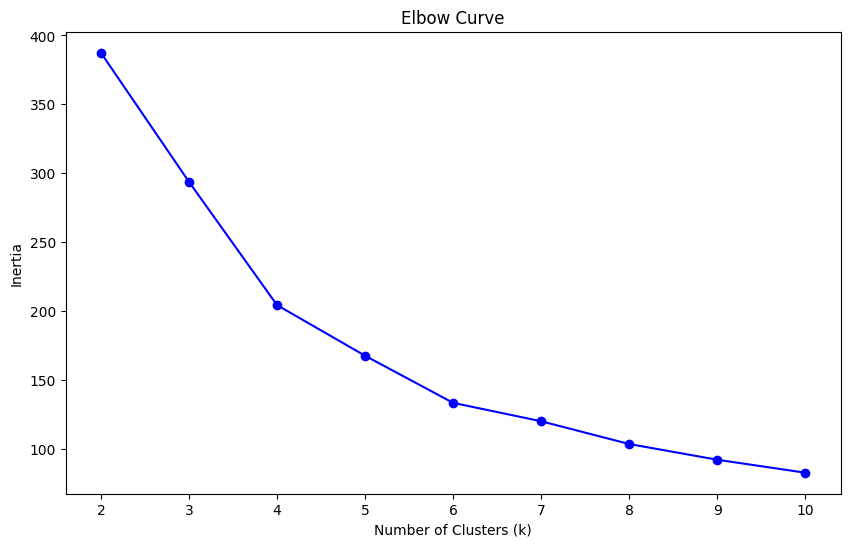

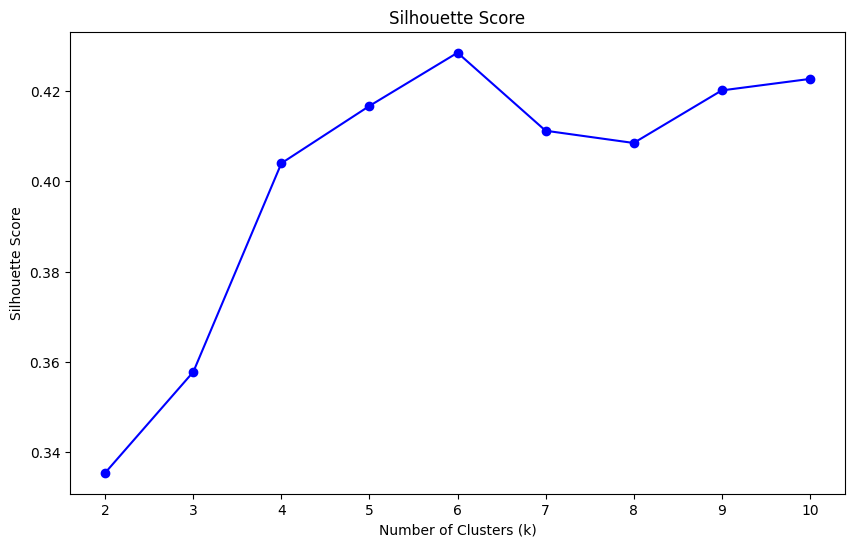

Rand Index: -0.004887561826634411
Silhouette Index: 0.41664341513732767
PCA Rand Index: -0.0020300428745649805
PCA Silhouette Index: 0.3898114280785039
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('shop.csv')

# Extract relevant features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the features
normalized_features = (features - features.mean()) / features.std()

# Find the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Test for k values from 2 to 10

for k in k_values:
    # Perform clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)

    # Calculate inertia and silhouette scores
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_features, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

# Choose the optimal k value based on the elbow curve
optimal_k = 5  # Adjust based on the elbow curve

# Perform clustering with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(normalized_features)

# Add cluster labels to the dataset
data['cluster'] = kmeans.labels_

# Evaluate clustering performance metrics
rand_index = adjusted_rand_score(data['Gender'], kmeans.labels_)
silhouette_index = silhouette_score(normalized_features, kmeans.labels_)

print(f"Rand Index: {rand_index}")
print(f"Silhouette Index: {silhouette_index}")

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(normalized_features)

# Perform clustering on PCA features
pca_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_kmeans.fit(pca_features)

# Add PCA-based cluster labels to the dataset
data['pca_cluster'] = pca_kmeans.labels_

# Evaluate PCA-based clustering performance metrics
pca_rand_index = adjusted_rand_score(data['Gender'], pca_kmeans.labels_)
pca_silhouette_index = silhouette_score(pca_features, pca_kmeans.labels_)

print(f"PCA Rand Index: {pca_rand_index}")
print(f"PCA Silhouette Index: {pca_silhouette_index}")

# Print the updated dataset with cluster labels
print(data)